# Wordnet (słowosieć)

## Solution of https://github.com/apohllo/nlp/blob/master/6-wordnet.md

In [1]:
import requests
import json

In [2]:
wordnet_api = 'http://api.slowosiec.clarin-pl.eu:80/plwordnet-api'

In [3]:
def get(url):
    r = requests.get(url)
    return json.loads(r.text)

In [4]:
def search_noun(noun):
    return get(f'{wordnet_api}/senses/search?lemma={noun}&&&partOfSpeech=noun&&&&&&')['content']

In [5]:
szkoda_nouns = search_noun('szkoda')

In [6]:
szkoda_meanings = [(meaning['domain'], meaning['id']) for meaning in szkoda_nouns ]

In [7]:
szkoda_meanings

[({'id': 12,
   'name': 'plWN_msc',
   'description': 'plWN miejsca i umiejscowienie',
   'lexicon': {'id': 1,
    'name': 'Słowosieć 2.2',
    'lexiconIdentifier': 'P 2.2',
    'language': 'pl'}},
  8769),
 ({'id': 18,
   'name': 'plWN_pos',
   'description': 'plWN posiadanie i jego zmiana',
   'lexicon': {'id': 1,
    'name': 'Słowosieć 2.2',
    'lexiconIdentifier': 'P 2.2',
    'language': 'pl'}},
  8771)]

In [8]:
def senses_sysnet(id_):
    return get(f'{wordnet_api}/senses/{id_}/synset')['id']

In [9]:
def sysnet_senses(id_):
    return get(f'{wordnet_api}/synsets/{id_}/senses')

In [10]:
def find_synonyms(id_):
    synonym_ids = senses_sysnet(id_)
    synonyms = sysnet_senses(synonym_ids)
    return(synonyms)

In [11]:
for meaning in szkoda_meanings:
    synonyms = find_synonyms(meaning[1])
    print(f'')
    for synonym in synonyms:
        synonym_id = synonym['id']
        synonym_description = synonym['domain']['description']
        synonym_lemma = synonym['lemma']
        print(f'id: {synonym_id}\ndescription: {synonym_description}\n lemma: {synonym_lemma}\n')


id: 8769
description: plWN miejsca i umiejscowienie
 lemma: {'id': 249489, 'word': 'szkoda'}


id: 8495
description: plWN zdarzenia
 lemma: {'id': 243080, 'word': 'strata'}

id: 9582
description: plWN zdarzenia
 lemma: {'id': 270916, 'word': 'utrata'}

id: 8771
description: plWN posiadanie i jego zmiana
 lemma: {'id': 249489, 'word': 'szkoda'}

id: 29762
description: plWN zdarzenia
 lemma: {'id': 270658, 'word': 'uszczerbek'}



In [12]:
get(f'{wordnet_api}/relationTypes')

[{'id': 10,
  'name': 'hiponimia',
  'multilingual': False,
  'lexicon': {'id': 1,
   'name': 'Słowosieć 2.2',
   'lexiconIdentifier': 'P 2.2',
   'language': 'pl'},
  'description': 'Hipo-/hiperonimia to podstawowa relacja kształtujaca hierarchiczną strukturę słownictwa. Jest to relacja, którą można określić jako implikację jednostronną. Hiperonimia jest relacją między jednostkami należącymi do tej samej klasy fleksyjnej. Warunek: Jednostki leksykalne synsetu X stanowią rodzaj jednostek synsetu Y, istnieje jeszcze co najmniej jeden synset Z, którego jednostki są rodzajem jednostek leksykalnych synsetu Y.',
  'displayText': '<x#> jest hiponimem <y#>',
  'shortDisplayText': 'hipo',
  'autoReverse': True},
 {'id': 11,
  'name': 'hiperonimia',
  'multilingual': False,
  'lexicon': {'id': 1,
   'name': 'Słowosieć 2.2',
   'lexiconIdentifier': 'P 2.2',
   'language': 'pl'},
  'description': 'Hipo-/hiperonimia to podstawowa relacja kształtująca hierarchiczną strukturę słownictwa.Jest to rela

In [13]:
hiperonimia_id = 11

In [14]:
def search_sense(expression):
    return get(f'{wordnet_api}/senses/search?lemma={expression}&&&&&&&&&')

In [15]:
wypadek_drogowy_first = search_sense('wypadek drogowy')['content'][0]

In [16]:
wypadek_drogowy_first

{'id': 644786,
 'domain': {'id': 8,
  'name': 'plWN_zdarz',
  'description': 'plWN zdarzenia',
  'lexicon': {'id': 1,
   'name': 'Słowosieć 2.2',
   'lexiconIdentifier': 'P 2.2',
   'language': 'pl'}},
 'lemma': {'id': 286392, 'word': 'wypadek drogowy'},
 'partOfSpeech': {'id': 2,
  'name': 'plWN rzeczownik',
  'lexicon': {'id': 1,
   'name': 'Słowosieć 2.2',
   'lexiconIdentifier': 'P 2.2',
   'language': 'pl'},
  'lmfType': 'noun'},
 'senseNumber': 1,
 'lexicon': {'id': 1,
  'name': 'Słowosieć 2.2',
  'lexiconIdentifier': 'P 2.2',
  'language': 'pl'}}

In [17]:
wypadek_drogowy_sysnet = senses_sysnet('644786')

In [18]:
wypadek_drogowy_sysnet

410902

In [19]:
def get_relations(id_, relation_id):
    content = get(f'{wordnet_api}/synsets/{id_}/relations')
    rel_list = list(filter(lambda x: x['relation']['id']==relation_id and x['synsetFrom']['id'] !=id_ , content))
    for item in rel_list:
        yield item['synsetFrom']['id']

In [20]:
def create_graph(relation_id, list_):
    rel_list = list(get_relations(list_[-1], relation_id))
    if rel_list==[]:
        return list_
    else:
        list_ += rel_list
        return create_graph(relation_id, list_)

In [21]:
hypernymy =create_graph(11, [wypadek_drogowy_sysnet])

In [22]:
hypernymy

[410902, 410901, 3982, 27419, 6526]

In [23]:
for id_ in hypernymy:
    res = sysnet_senses(id_)
    print(f'id: {id_}')
    for r in res:
        description = r['domain']['description']
        lemma = r['lemma']
        print(f'description: {description}, lemma: {lemma}')

id: 410902
description: plWN zdarzenia, lemma: {'id': 286392, 'word': 'wypadek drogowy'}
id: 410901
description: plWN zdarzenia, lemma: {'id': 286393, 'word': 'wypadek komunikacyjny'}
id: 3982
description: plWN zdarzenia, lemma: {'id': 286391, 'word': 'wypadek'}
id: 27419
description: plWN zdarzenia, lemma: {'id': 294893, 'word': 'zdarzenie oceniane negatywnie'}
id: 6526
description: plWN zdarzenia, lemma: {'id': 284803, 'word': 'wydarzenie'}
description: plWN zdarzenia, lemma: {'id': 101333, 'word': 'historia'}
description: plWN zdarzenia, lemma: {'id': 286391, 'word': 'wypadek'}
description: plWN zdarzenia, lemma: {'id': 294891, 'word': 'zdarzenie'}


In [24]:
def get_lemmas(id_):
    res = sysnet_senses(id_)
    words = ""
    for r in res:
        words += ' ' + r['lemma']['word']
    return words

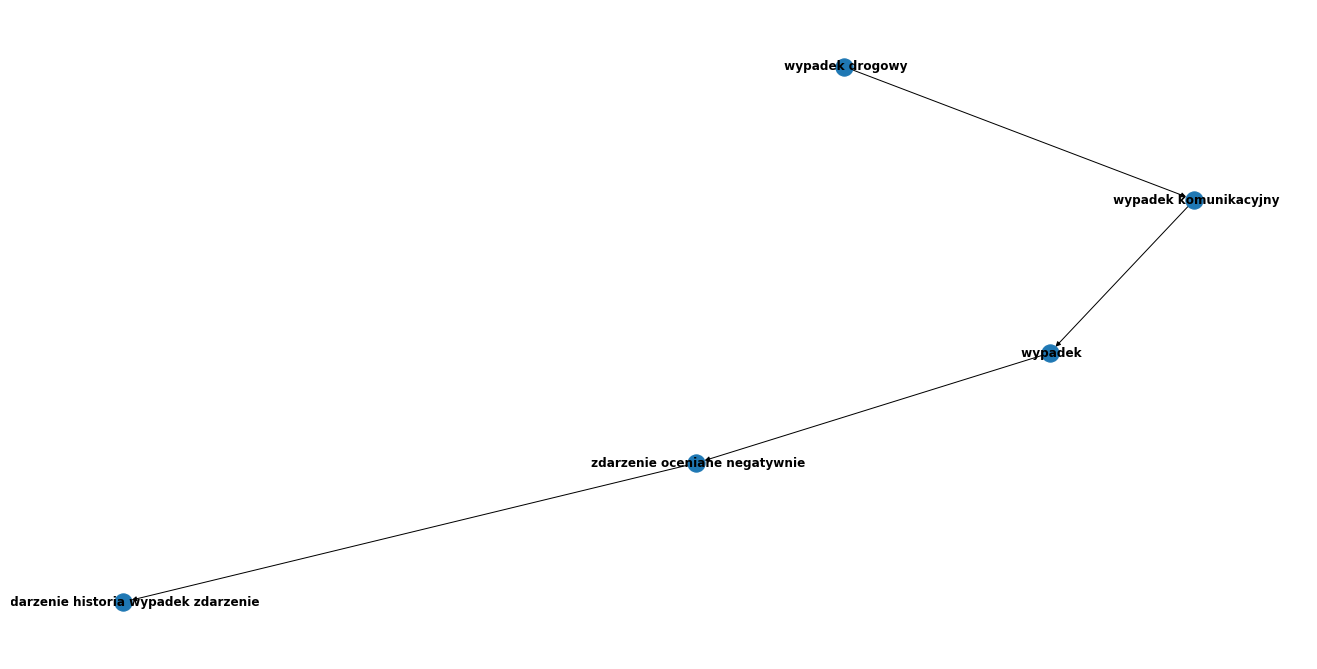

In [41]:
import matplotlib.pyplot as plt
import networkx as nx
G = nx.DiGraph()
for i in range(0, len(hypernymy)-1):
    G.add_edge(get_lemmas(hypernymy[i]), get_lemmas(hypernymy[i+1]))
plt.figure(figsize=(18,9))
nx.draw(G, with_labels=True, font_weight='bold')

In [42]:
wypadek_nouns = search_noun('wypadek')

In [43]:
wypadek_list = list(filter(lambda noun: noun['senseNumber']== 1 , wypadek_nouns))

In [44]:
wypadek_meanings = [(meaning['domain'], meaning['id'], meaning['lemma']) for meaning in wypadek_list ]

In [45]:
wypadek_meanings

[({'id': 8,
   'name': 'plWN_zdarz',
   'description': 'plWN zdarzenia',
   'lexicon': {'id': 1,
    'name': 'Słowosieć 2.2',
    'lexiconIdentifier': 'P 2.2',
    'language': 'pl'}},
  21890,
  {'id': 286391, 'word': 'wypadek'}),
 ({'id': 8,
   'name': 'plWN_zdarz',
   'description': 'plWN zdarzenia',
   'lexicon': {'id': 1,
    'name': 'Słowosieć 2.2',
    'lexiconIdentifier': 'P 2.2',
    'language': 'pl'}},
  644786,
  {'id': 286392, 'word': 'wypadek drogowy'}),
 ({'id': 8,
   'name': 'plWN_zdarz',
   'description': 'plWN zdarzenia',
   'lexicon': {'id': 1,
    'name': 'Słowosieć 2.2',
    'lexiconIdentifier': 'P 2.2',
    'language': 'pl'}},
  644778,
  {'id': 286393, 'word': 'wypadek komunikacyjny'}),
 ({'id': 8,
   'name': 'plWN_zdarz',
   'description': 'plWN zdarzenia',
   'lexicon': {'id': 1,
    'name': 'Słowosieć 2.2',
    'lexiconIdentifier': 'P 2.2',
    'language': 'pl'}},
  30231,
  {'id': 286394, 'word': 'wypadek losowy'}),
 ({'id': 8,
   'name': 'plWN_zdarz',
   'desc

In [46]:
wypadek_ids = [21890]
wypadek_ids2 = list(map(lambda x: senses_sysnet(x), wypadek_ids))

In [47]:
wypadek_ids2

[3982]

In [48]:
for id_ in wypadek_ids2:
    print(id_)
    rel = list(get_relations(id_,10))
    for r in rel:
        r_sense = sysnet_senses(r)
        for r2 in r_sense:
            r2_id = r2['id']
            r2_word =r2['lemma']['word']
            print(f'id {r2_id}, word:{r2_word}')

3982
id 52898, word:zawał
id 52894, word:tąpnięcie
id 19923, word:katastrofa
id 393642, word:wykolejenie
id 618773, word:zakrztuszenie
id 618779, word:zachłyśnięcie
id 644778, word:wypadek komunikacyjny
id 645560, word:katastrofa budowlana


In [37]:
first_order = []

In [38]:
for id_ in wypadek_ids2:
    print(id_)
    rel = list(get_relations(id_,10))
    r_sense = sysnet_senses(rel[0])
    for r2 in r_sense:
        r2_id = r2['id']
        first_order.append(r2_id)
        r2_word =r2['lemma']['word']
        print(f'id {r2_id}, word:{r2_word}')

3982
id 52898, word:zawał


In [39]:
first_order2 = list(map(lambda x: senses_sysnet(x), first_order))

In [51]:
for id_ in first_order2:
    print(id_)
    rel = list(get_relations(id_,10))
    if rel!=[]:
        for r in rel:
            r_sense = sysnet_senses(r)
            for r2 in r_sense:
                r2_id = r2['id']
                r2_word =r2['lemma']['word']
                print(f'id {r2_id}, word:{r2_word}')

34688
id 56050, word:obwał


In [287]:
lexemes = [('szkoda', 2), ('strata', 1), ('uszczerbek', 1), ('szkoda majątkowa', 1), ('uszczerbek na zdrowiu', 1), ('krzywda', 1), ('niesprawiedliwość', 1),
          ('nieszczęście', 2)]

In [96]:
def serach_lexeme(lexeme):
    return search_sense(lexeme)['content']

In [97]:
def filter_number(response, number):
    return list(filter(lambda noun: noun['senseNumber']== number , response))

In [336]:
lexemes_numbers = [filter_number(serach_lexeme(lexeme[0]), lexeme[1]) for lexeme in lexemes]
lexemes_numbers2 = list(map(lambda x: x[0],(filter (lambda x: x!=[], lexemes_numbers))))
sysnet_id = list(map(lambda x: (x['lemma']['word'], senses_sysnet(x['id'])), lexemes_numbers2))
posiible_ids = set(map(lambda x: x[1], sysnet_id))


In [337]:
filtered = []
for id_ in posiible_ids: 
    relations = []
    relations += get_all_relations(id_)
    filtered += filter_relations(relations, posiible_ids)


In [338]:
create_tuples(filtered)

{(1439, 3675, 10),
 (1439, 5640, 10),
 (3675, 1439, 11),
 (3675, 46769, 11),
 (5640, 1439, 11),
 (46769, 3675, 10)}

In [329]:
def get_all_relations(_id):
    content = get(f'{wordnet_api}/synsets/{id_}/relations')
    rel_list = list(filter(lambda x: x['synsetFrom']['id'] ==id_ or x['synsetTo']['id'] ==id_ , content))
    return content

In [330]:
def filter_relations(relations, posiible_ids):
    return list(filter(lambda x: x['synsetFrom']['id'] in posiible_ids and x['synsetTo']['id'] in posiible_ids , relations))

In [331]:
def create_tuples(content):
    return set(map(lambda x: (x['synsetFrom']['id'], x['synsetTo']['id'], x['relation']['id']), content ))

In [399]:
tuple_set

{(3982, 410901, 11),
 (3982, 411618, 11),
 (410901, 3982, 10),
 (410901, 410902, 11),
 (410902, 410901, 10),
 (411618, 3982, 10)}

In [254]:
from matplotlib.collections import LineCollection
from fa2 import ForceAtlas2
from curved_edges import curved_edges
from networkx.drawing.nx_agraph import to_agraph 
from networkx.drawing.nx_pydot import write_dot



In [339]:
relation_dict = {10: 'hiponimia', 11: "hiperonimia"}

In [340]:
G = nx.MultiDiGraph(format='png', directed=True)

labels = {}    
for t in tuple_set:
    G.add_edge(get_lemmas(t[0]), get_lemmas(t[1]), label=relation_dict[t[2]])
    labels[(get_lemmas(t[0]), get_lemmas(t[1]))] = t[2]

G.graph['edge'] = {'arrowsize': '2', 'splines': 'curved'}
G.graph['graph'] = {'scale': '3'}


In [341]:
write_dot(G,'g1.dot')

In [342]:
!neato -T png g1.dot > g1.png

<img src="g1.png"> 

In [343]:
lexemes_2 = [('wypadek',1), ('wypadek komunikacyjny', 1), ('kolizja', 2), ('zderzenie', 2), ('kolizja drogowa',1), ('bezkolizyjny' ,2), ('katastrofa budowlana',1), ('wypadek drogowy', 1)]

In [344]:
lexemes_numbers = [filter_number(serach_lexeme(lexeme[0]), lexeme[1]) for lexeme in lexemes_2]
lexemes_numbers2 = list(map(lambda x: x[0],(filter (lambda x: x!=[], lexemes_numbers))))
sysnet_id = list(map(lambda x: (x['lemma']['word'], senses_sysnet(x['id'])), lexemes_numbers2))
posiible_ids = set(map(lambda x: x[1], sysnet_id))


In [345]:
filtered = []
for id_ in posiible_ids: 
    relations = []
    relations += get_all_relations(id_)
    filtered += filter_relations(relations, posiible_ids)

In [347]:
tuple_set =create_tuples(filtered)

In [348]:
G = nx.MultiDiGraph(format='png', directed=True)

labels = {}    
for t in tuple_set:
    G.add_edge(get_lemmas(t[0]), get_lemmas(t[1]), label=relation_dict[t[2]])
    labels[(get_lemmas(t[0]), get_lemmas(t[1]))] = t[2]

G.graph['edge'] = {'arrowsize': '2', 'splines': 'curved'}
G.graph['graph'] = {'scale': '3'}


In [349]:
write_dot(G,'g2.dot')

In [350]:
!neato -T png g2.dot > g2.png

<img src="g2.png"> 

In [371]:
from WNQuery import *

In [375]:
import os

In [384]:
querry = WNQuery('./plwordnet-3.1-visdisc.xml', log=open(os.devnull, "w"))

In [390]:
szkoda_sense = querry.lookUpSense("szkoda", 2, "n").wnid
wypadek_sense = querry.lookUpSense("wypadek", 1, "n").wnid

In [392]:
querry.simLeaCho(szkoda_sense, wypadek_sense, 'n', 'hypernym', True)

1.2430380486862944

In [394]:
kolizja_sense = querry.lookUpSense("kolizja", 2, "n").wnid
szkoda_majatkowa_sense = querry.lookUpSense("szkoda majątkowa", 1, "n").wnid

In [395]:
querry.simLeaCho(kolizja_sense, szkoda_majatkowa_sense, 'n', 'hypernym', True)

1.0669467896306133

In [397]:
nieszczescie_sense = querry.lookUpSense("nieszczęście", 2, "n").wnid
katastrofa_budowlana_sense = querry.lookUpSense("katastrofa budowlana", 1, "n").wnid

In [398]:
querry.simLeaCho(nieszczescie_sense, katastrofa_budowlana_sense, 'n', 'hypernym', True)

0.8908555305749319